In this project, a CNN is built to perform classification on color images based on the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 70s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(32, 32, 3)

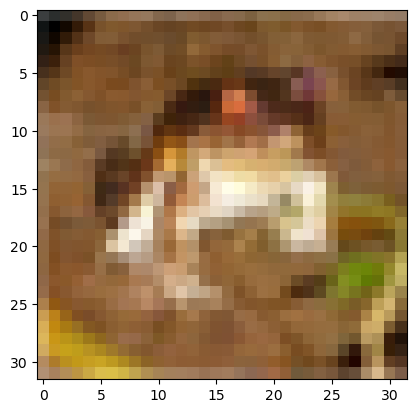

In [6]:
plt.imshow(single_image)

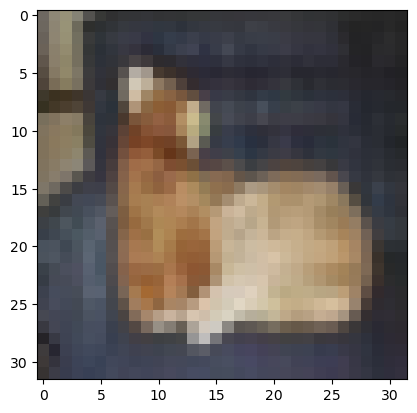

In [9]:
plt.imshow(X_train[17])

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train.shape

(50000, 1)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-10-19 14:38:38.675334: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 14:38:38.676260: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [27]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 120s 2ms/sample - loss: 1.4772 - accuracy: 0.4655 - val_loss: 1.2370 - val_accuracy: 0.5624
Epoch 2/15
50000/50000 [==============================] - 117s 2ms/sample - loss: 1.1566 - accuracy: 0.5917 - val_loss: 1.1587 - val_accuracy: 0.5915
Epoch 3/15
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.0114 - accuracy: 0.6467 - val_loss: 1.0521 - val_accuracy: 0.6368
Epoch 4/15
50000/50000 [==============================] - 120s 2ms/sample - loss: 0.8983 - accuracy: 0.6862 - val_loss: 1.0213 - val_accuracy: 0.6469
Epoch 5/15
50000/50000 [==============================] - 117s 2ms/sample - loss: 0.8105 - accuracy: 0.7167 - val_loss: 0.9929 - val_accuracy: 0.6637
Epoch 6/15
50000/50000 [==============================] - 117s 2ms/sample - loss: 0.7309 - accuracy: 0.7440 - val_loss: 0.9847 - val_accuracy: 0.6684
Epoch 7/15
50000/50000 [==========================

In [29]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.477208,0.46554,1.236970,0.5624
1,1.156589,0.59168,1.158650,0.5915
2,1.011355,0.64670,1.052127,0.6368
3,0.898279,0.68624,1.021340,0.6469
4,0.810496,0.71670,0.992875,0.6637
5,0.730877,0.74396,0.984706,0.6684
6,0.660161,0.77008,0.950385,0.6916
7,0.599318,0.78964,1.002795,0.6813
8,0.536651,0.80974,1.019595,0.6833


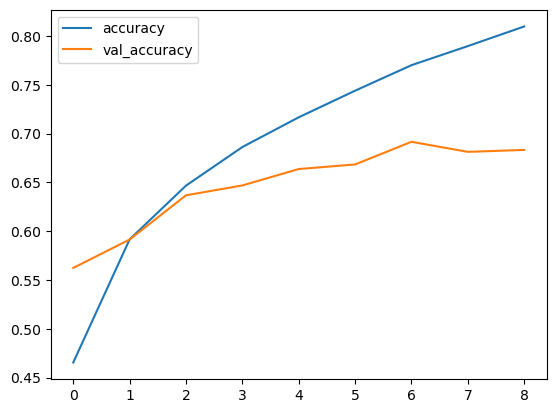

In [30]:
losses[['accuracy','val_accuracy']].plot();

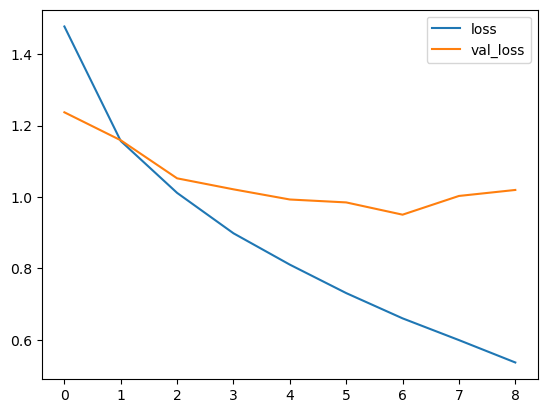

In [31]:
losses[['loss','val_loss']].plot();

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
pred = model.predict_classes(X_test)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.79      0.83      0.81      1000
           2       0.61      0.56      0.58      1000
           3       0.45      0.53      0.49      1000
           4       0.69      0.56      0.62      1000
           5       0.58      0.62      0.60      1000
           6       0.77      0.73      0.75      1000
           7       0.75      0.69      0.72      1000
           8       0.75      0.82      0.78      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [39]:
confusion_matrix(y_test, pred)

array([[ 972,    1,    4,    1,    0,    2,    0,    0,    0,    0],
       [   1, 1130,    1,    1,    0,    1,    1,    0,    0,    0],
       [   0,    1, 1028,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    5,  997,    0,    3,    0,    0,    4,    1],
       [   0,    0,    6,    0,  964,    0,    1,    0,    2,    9],
       [   2,    0,    1,    5,    0,  882,    1,    0,    1,    0],
       [   5,    1,    2,    1,    4,    5,  938,    0,    2,    0],
       [   0,    2,   12,    2,    0,    0,    0, 1004,    2,    6],
       [   2,    1,    5,    0,    0,    2,    0,    1,  960,    3],
       [   0,    1,    0,    3,    3,   12,    0,    2,    3,  985]])

In [36]:
my_image = X_test[17]

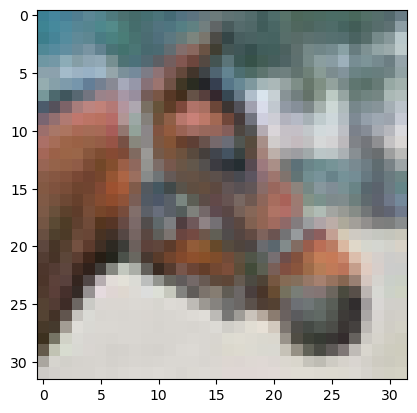

In [37]:
plt.imshow(my_image);

In [39]:
model.predict_classes(my_image.reshape(1,32,32,3)) #correctly predicted

array([7])